In [39]:
#standard ds
import pandas as pd
import numpy as np

#viz and stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr

#splits, scale
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#my env file
import env
import wrangle_lugo as wl

In [4]:
df = wl.get_wine_data()

In [6]:
df = wl.prep_wine_data(df)

In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_type_white_wine
0,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,9.4,6,red_wine,0
1,6.3,0.390,0.16,1.4,0.080,11.0,23.0,0.9955,3.34,0.56,9.3,5,red_wine,0
2,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.9962,3.28,0.59,9.5,5,red_wine,0
3,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.9993,3.45,0.52,9.4,6,red_wine,0
4,8.1,0.380,0.28,2.1,0.066,13.0,30.0,0.9968,3.23,0.73,9.7,7,red_wine,0


In [10]:
tr, val, ts = wl.get_split(df)

In [12]:
tr.shape

(2730, 14)

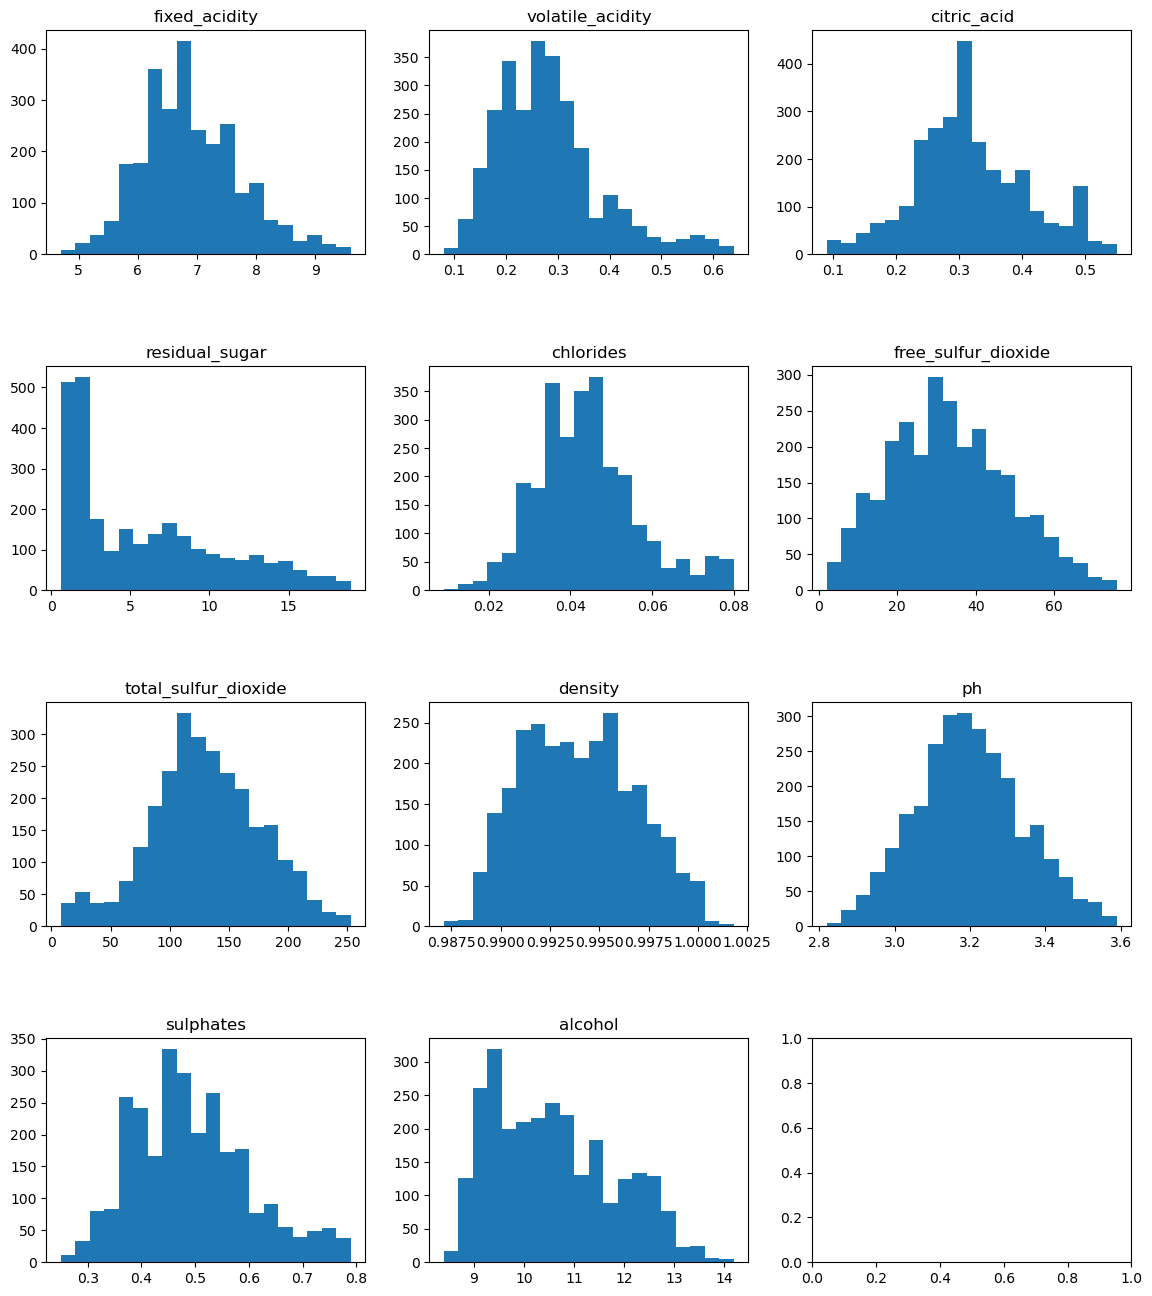

In [13]:
# distribution of all my variables
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 16))
fig.subplots_adjust(hspace=0.5)

for ax, col in zip(axes.flatten(), tr.columns[:-3]):
    ax.hist(tr[col], bins=20)
    ax.set(title=col)

plt.show()

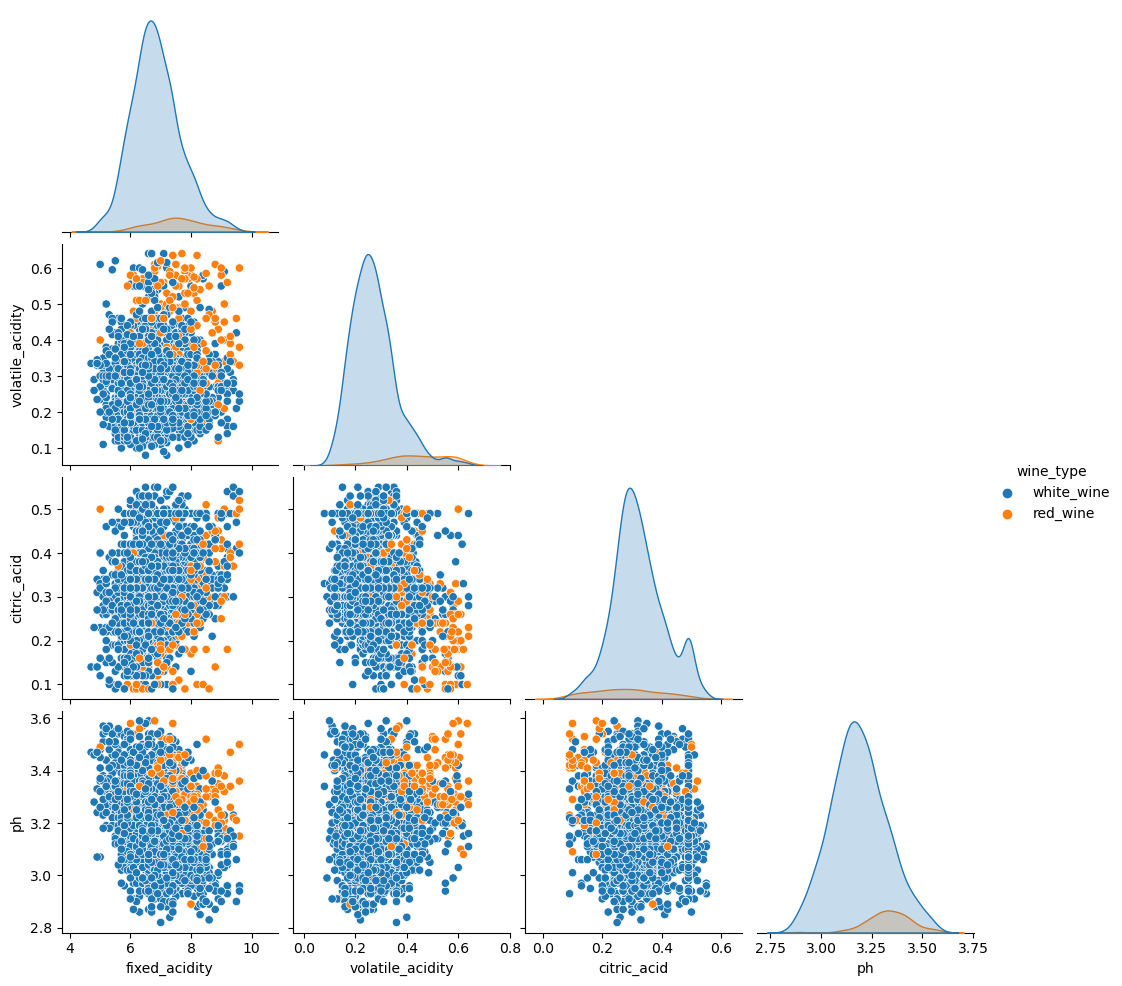

In [16]:
#only looking at my unprocessed data only
sns.pairplot(tr[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'ph', 'wine_type']], hue='wine_type', corner=True)
plt.show()

<AxesSubplot:xlabel='wine_type', ylabel='quality'>

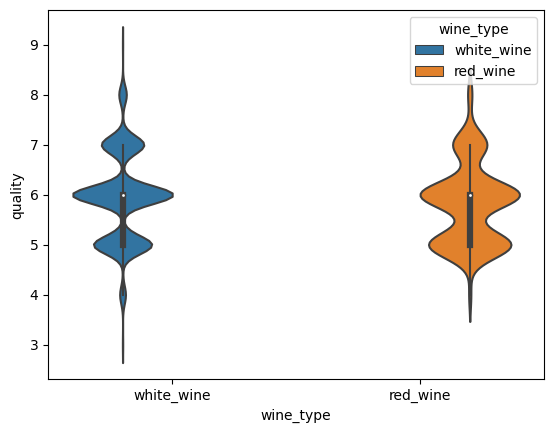

In [17]:
# Create a violin plot with 'wine_type' on the x-axis, 'quality' on the y-axis, and hue by 'wine_type'
sns.violinplot(x='wine_type', y='quality', hue='wine_type', data=tr)

<AxesSubplot:xlabel='fixed_acidity', ylabel='quality'>

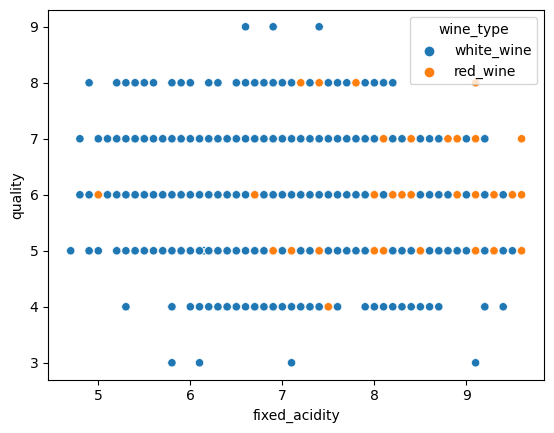

In [18]:
# Create a scatter plot with 'fixed acidity' on the x-axis, 'quality' on the y-axis, and hue by 'wine_type'
sns.scatterplot(x='fixed_acidity', y='quality', hue='wine_type', data=tr)

<AxesSubplot:xlabel='volatile_acidity', ylabel='quality'>

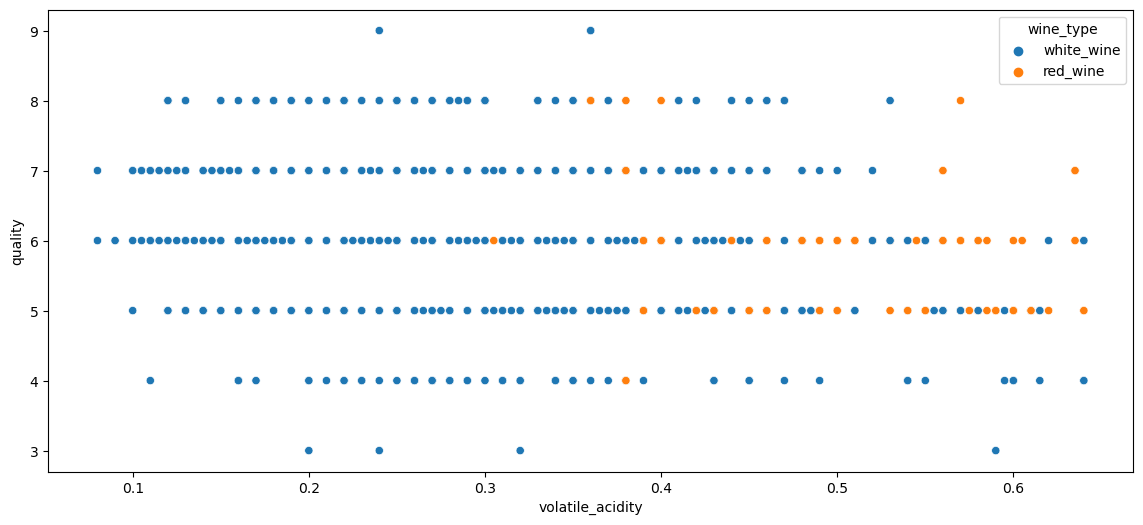

In [19]:
# Create a scatter plot with 'fixed acidity' on the x-axis, 'quality' on the y-axis, and hue by 'wine_type'
plt.figure(figsize=(14, 6))

sns.scatterplot(x='volatile_acidity', y='quality', hue='wine_type', data=tr)

<AxesSubplot:xlabel='citric_acid', ylabel='quality'>

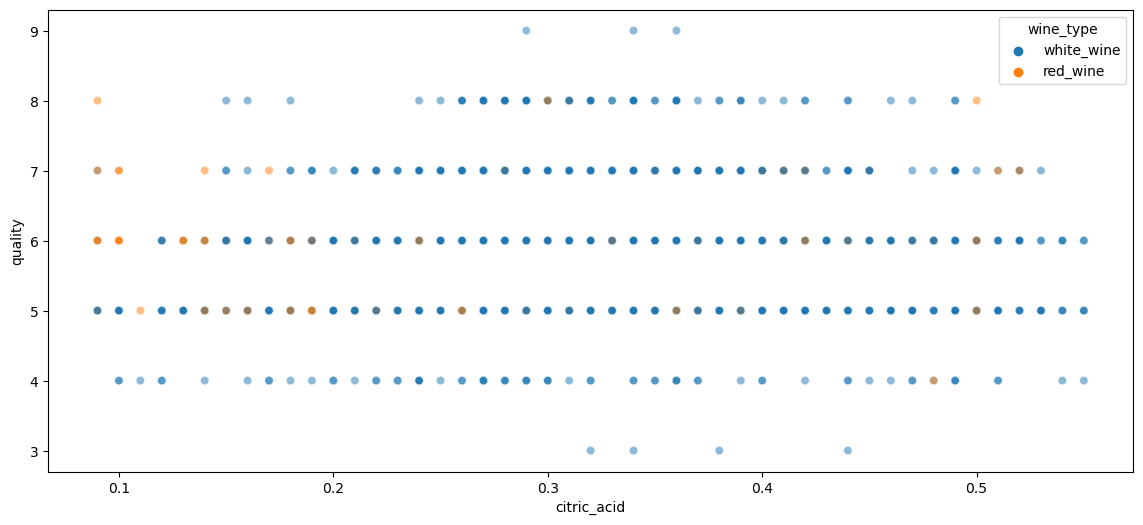

In [20]:
# Create a scatter plot with 'fixed acidity' on the x-axis, 'quality' on the y-axis, and hue by 'wine_type'
plt.figure(figsize=(14, 6))

sns.scatterplot(x='citric_acid', y='quality', hue='wine_type', alpha=0.5, data=tr)

In [24]:
col_list = list(df.drop(columns=['quality']).columns)

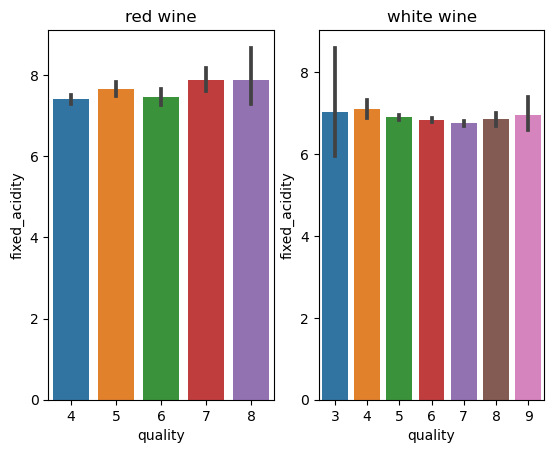

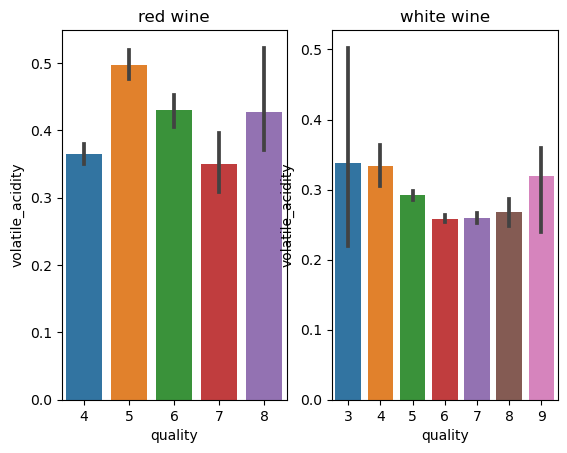

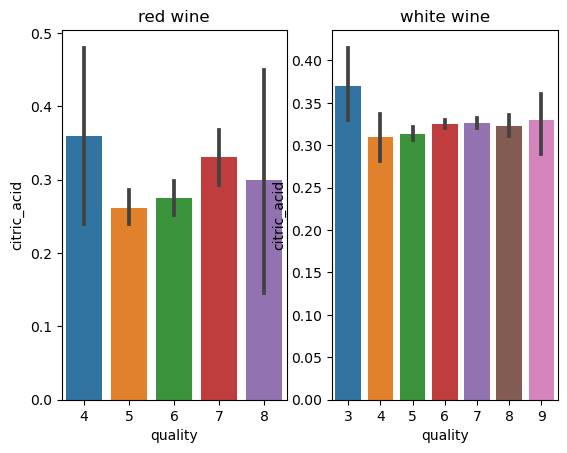

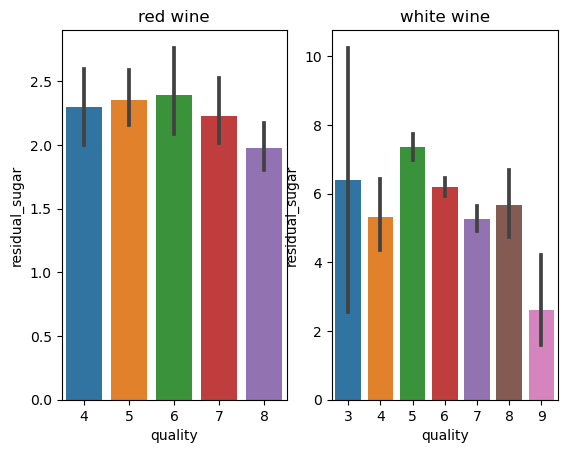

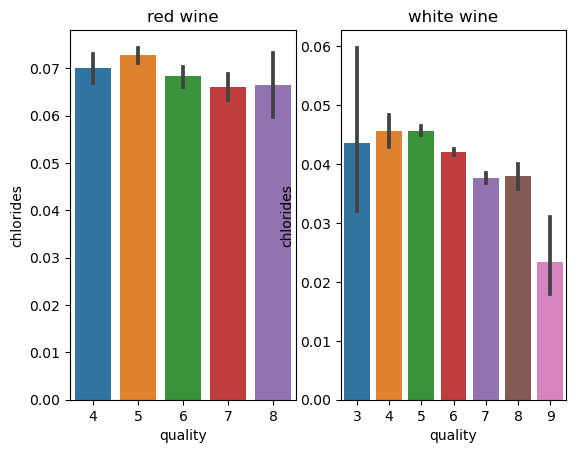

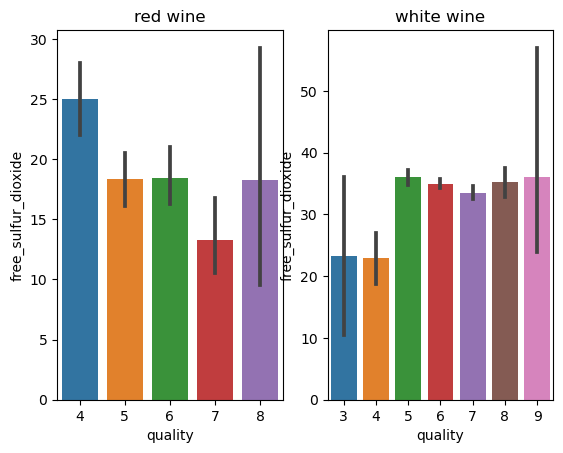

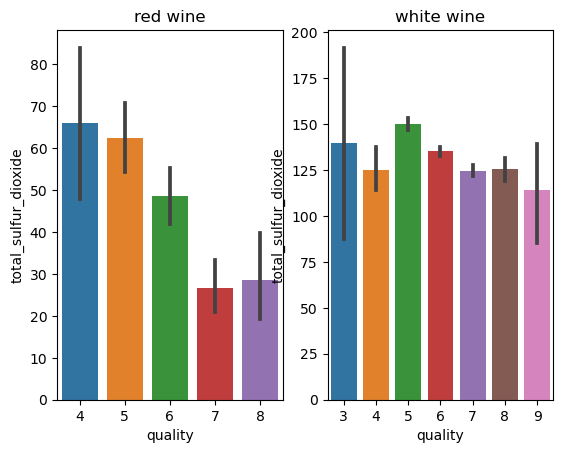

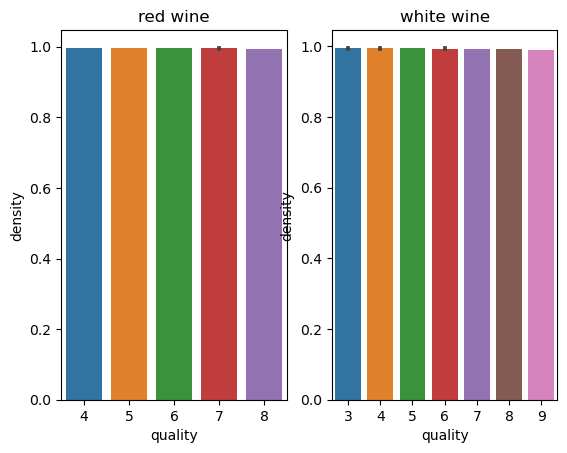

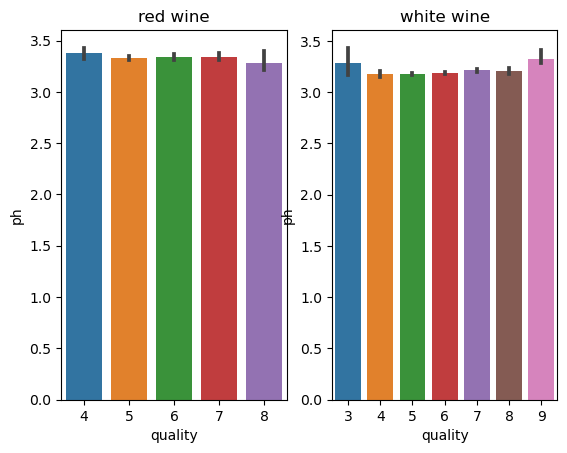

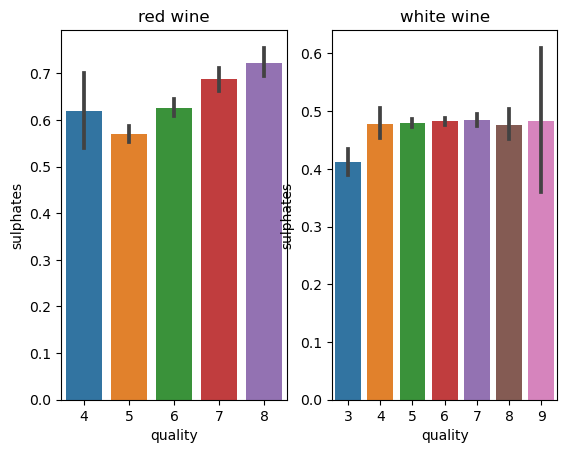

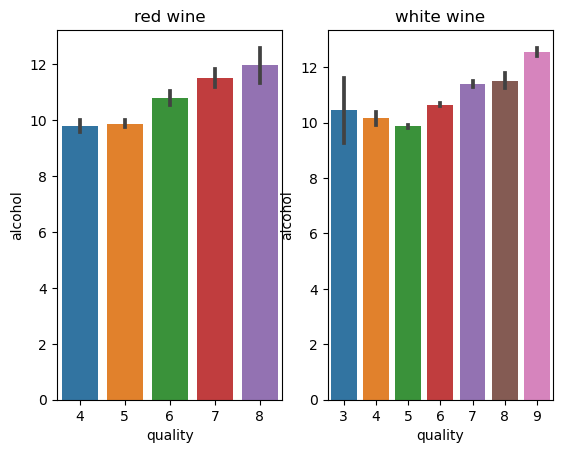

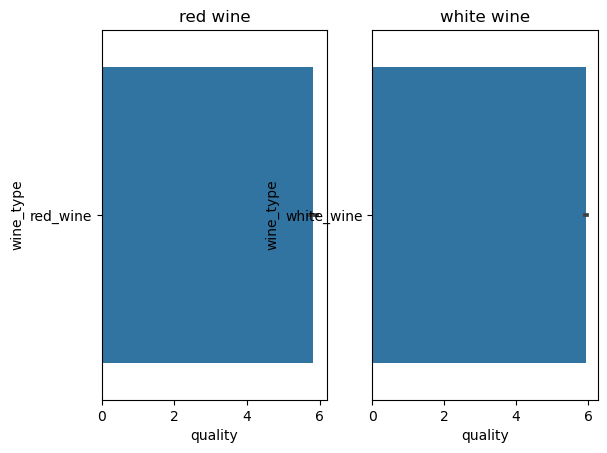

In [25]:
# for red and white wine split
red_df = tr[tr.wine_type == 'red_wine']
white_df = tr[tr.wine_type == 'white_wine']

for col in col_list[:-1]:
    plt.subplot(1,2,1)
    sns.barplot(data = red_df, x='quality', y=col)
    plt.title('red wine')
    plt.subplot(1,2,2)
    sns.barplot(data = white_df, x='quality', y=col)
    plt.title('white wine')
    plt.show()

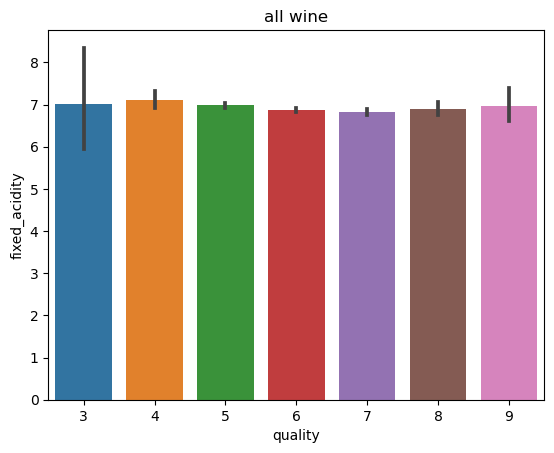

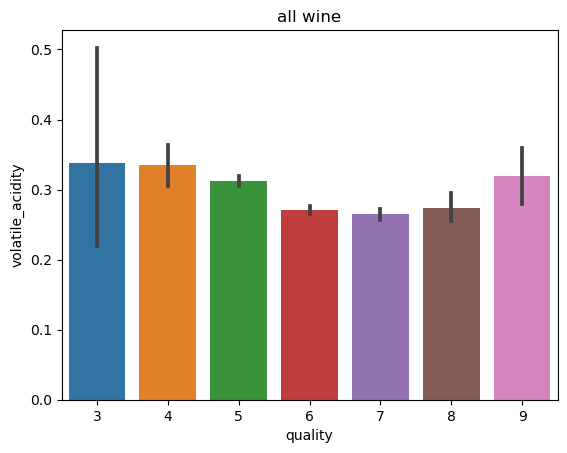

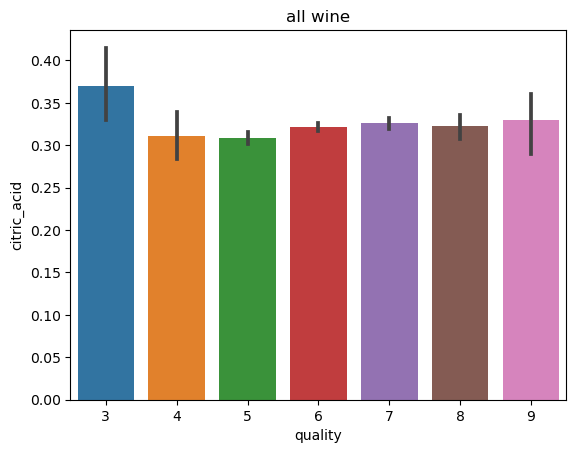

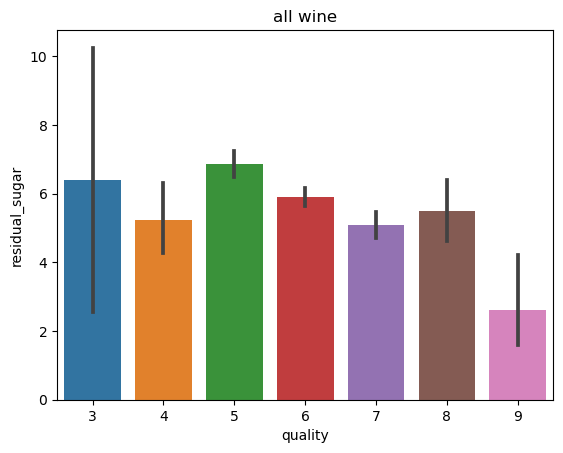

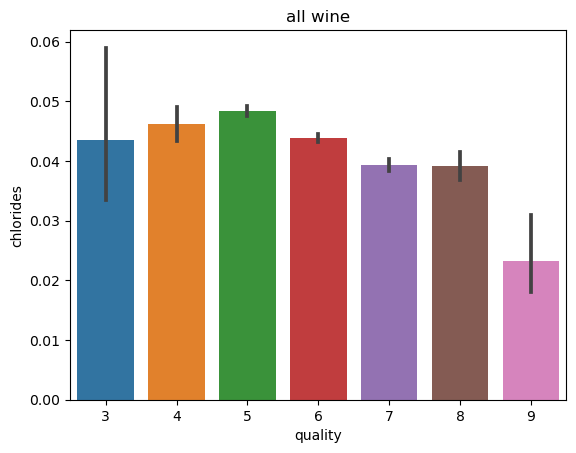

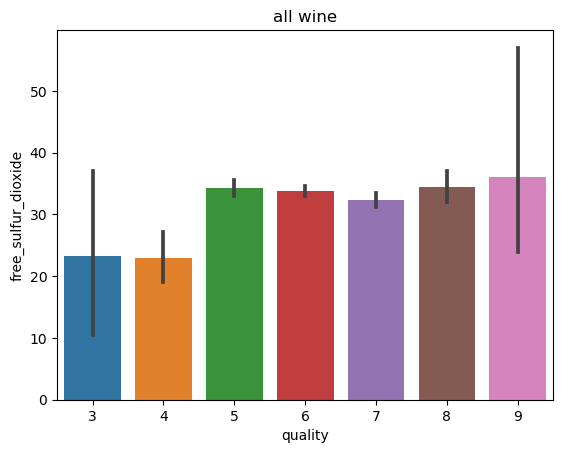

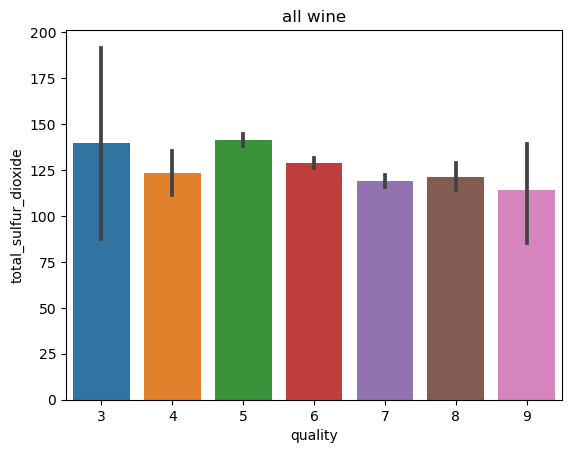

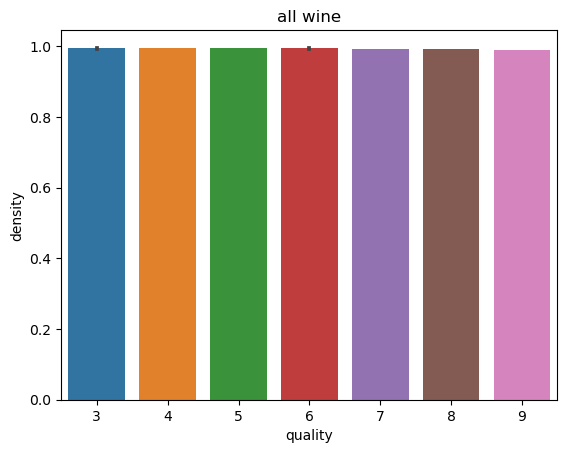

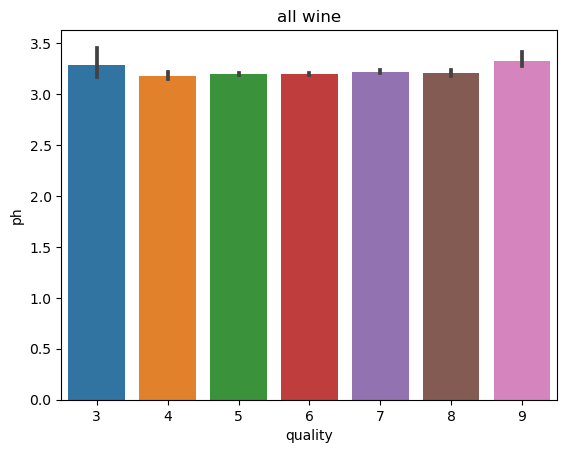

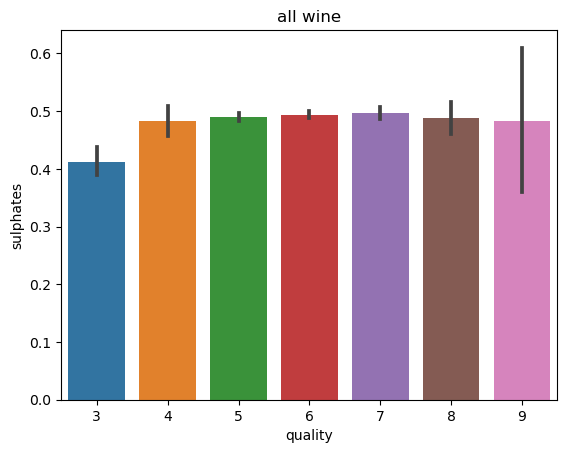

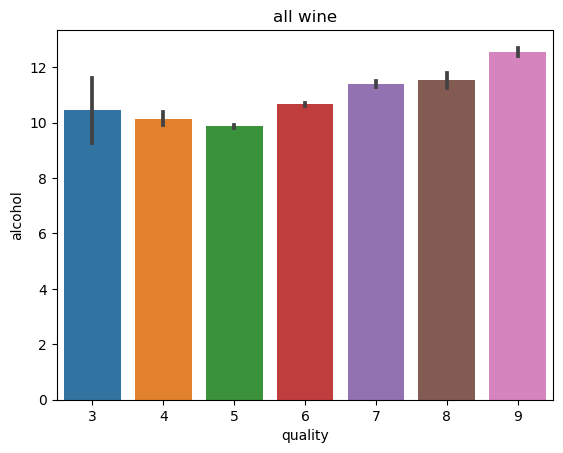

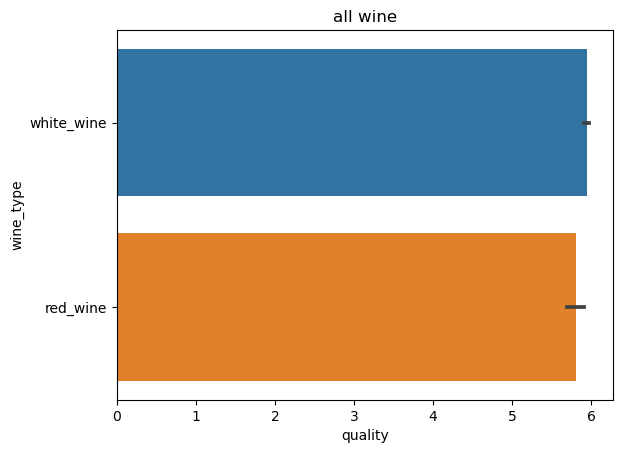

In [26]:
# And here's the boxplot code for all wines:

for col in col_list[:-1]:
    sns.barplot(data = tr, x='quality', y=col)
    plt.title('all wine')
    plt.show()

In [40]:
# calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(tr['fixed_acidity'], tr['quality'])

# print the results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.066
P-value: 0.001


In [42]:
# calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(tr['volatile_acidity'], tr['quality'])

# print the results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.174
P-value: 0.000


In [43]:
# calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(tr['citric_acid'], tr['quality'])

# print the results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.063
P-value: 0.001


In [44]:
# calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(tr['ph'], tr['quality'])

# print the results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.058
P-value: 0.003


In [45]:
# calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(tr['chlorides'], tr['quality'])

# print the results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.245
P-value: 0.000


In [46]:
# calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(tr['residual_sugar'], tr['quality'])

# print the results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.104
P-value: 0.000


In [47]:
# calculate the Pearson correlation coefficient and p-value
corr, p_value = pearsonr(tr['density'], tr['quality'])

# print the results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: -0.316
P-value: 0.000


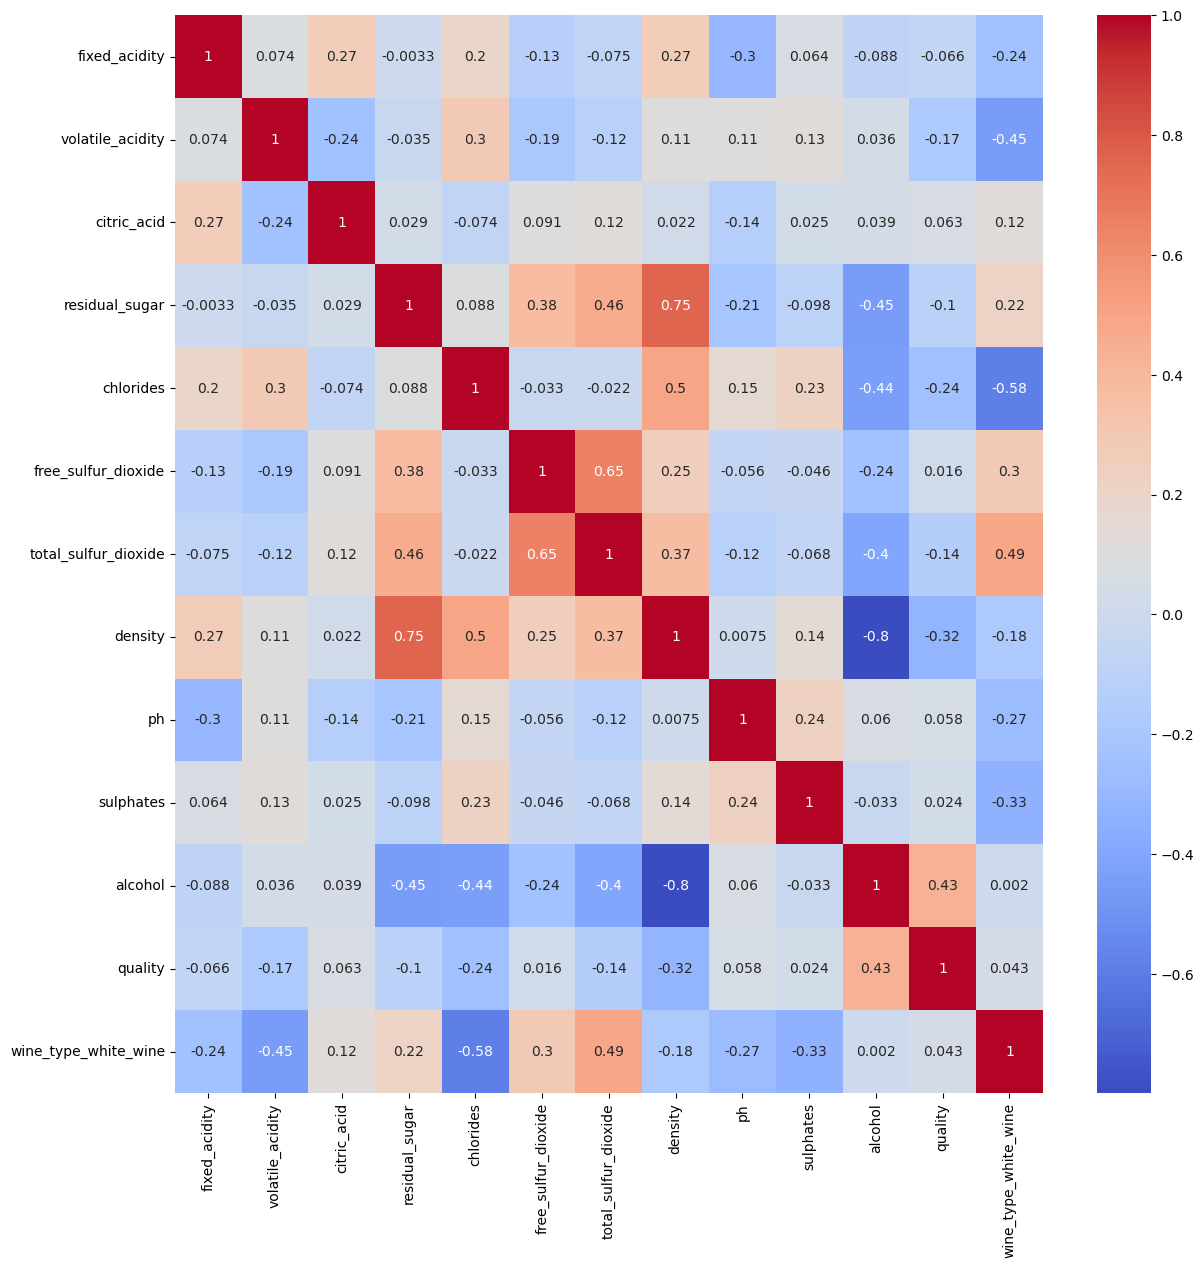

In [49]:
plt.figure(figsize=(14, 14))
# calculate the correlation matrix
corr_matrix = tr.corr()

# create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# show the plot
plt.show()